# Data Exploration

This notebook is about basic data exploration, which gives important insight into the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image
from torchvision import datasets
from tqdm import tqdm

In [2]:
training_image = Image.open('data/train/NORMAL/IM-0119-0001.jpeg')
print(training_image.format)
print(training_image.mode)
print(training_image.size)


JPEG
L
(1810, 1434)


Load in the data using Pytorch's datasets module to save RAM.

In [3]:
data = {
    'train':
    datasets.ImageFolder(root='./data/train/'),
    'val':
    datasets.ImageFolder(root='./data/val/'),
    'test':
    datasets.ImageFolder(root='./data/test/')
}

First, get a basic idea of how the data looks like.

<PIL.Image.Image image mode=RGB size=2090x1858 at 0x7F19F0267510>
The image has the following shape (1858, 2090, 3)
The image has the following shape (1152, 1422, 3)
The image has the following shape (1434, 1810, 3)
The image has the following shape (1279, 1618, 3)
The image has the following shape (1125, 1600, 3)
The image has the following shape (1306, 1974, 3)
The image has the following shape (1013, 1528, 3)
The image has the following shape (1167, 1384, 3)
The image has the following shape (1144, 1450, 3)
The image has the following shape (993, 1468, 3)


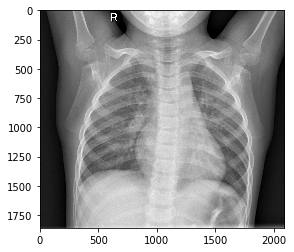

In [4]:
first_image, first_label = data['train'][0]
print(first_image)
for i in range(10):
    image, label = data['train'][i]
    print('The image has the following shape', np.asarray(image).shape)
plt.imshow(first_image)


In [5]:
def check_shape(image):
    if len(np.asarray(image).shape) == 3:
        pass
    else:
        print('Strange shape found', np.asarray(image).shape)

The next for-loop checks if there are any non (x, y, 3) shapes and at the same time gets the number of total pneumonia and normal lungs, which will be later of use.

In [6]:
pneumonia = 0
normal = 0

for phase in tqdm(data):
    data_phase = data[phase]
    for image, label in data_phase:
        check_shape(image)
        if label == 0:
            normal += 1
        else:
            pneumonia += 1

100%|██████████| 3/3 [00:45<00:00, 15.17s/it]


What is the current split in percentages?

In [7]:
len_train = len(data['train'])
len_val = len(data['val'])
len_test = len(data['test'])
len_dataset = len_train + len_val + len_test


Train data is 0.8907103825136612%, Validation data is 0.00273224043715847% and Test data is 0.10655737704918032%


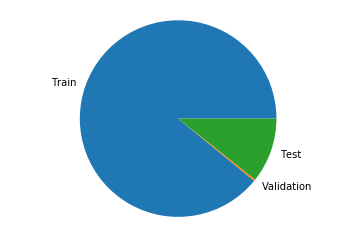

In [8]:
total_size = len(data['train']) + len(data['val']) + len(data['test'])
train_percentage = len(data['train']) / total_size
val_percentage = len(data['val']) / total_size
test_percentage = len(data['test']) / total_size

print("Train data is {}%, Validation data is {}% and Test data is {}%"
      .format(train_percentage, val_percentage, test_percentage))

x = ("Train", "Validation", "Test")
y = [train_percentage, val_percentage, test_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(y, labels=x)
ax1.axis('equal')
plt.show()

normal data:  1583
pneunomia data:  4273


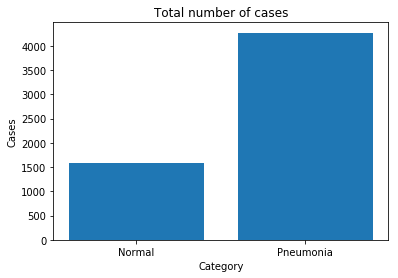

In [9]:
print("normal data: ", normal)
print("pneunomia data: ", pneumonia)
x = ("Normal", "Pneumonia")
y = [normal, pneumonia]
plt.title("Total number of cases")
plt.xlabel("Category")
plt.ylabel("Cases")
plt.bar(x, y)
plt.savefig('cases.png')
plt.show()
